In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# The Pytorch Tensor

As we've already explored the "Tensor" is a useful concept and is very useful in Machine Learning, however you probably noticed in Numpy that our "Tensors" are called "Arrays", but now we are in Pytorch this is no more!!
Let's do a recap of Numpy arrays and how similar they are to Pytorch tensors.

In [2]:
# Create some "Matrices" as lists of lists  

# 3x3
W = [[1, 1, 1],
     [1.5, 1.5, 1.5],
     [2, 2, 2]]

# 3x1
x = [[6], [7], [8]]
# 3x1
b = [[1], [1], [1]]

# Variable to store output
# 3x1
y = [[0], [0], [0]]

In [3]:
# We can transform our list of lists into a "numpy array" by using the function "array"
W_np = np.array(W)

x_np = np.array(x)

# Lets use the function "ones" to create an array of ones!
b_np = np.ones((3, 1))

# Lets now compute Wx + b using these numpy variables!
output = np.matmul(W_np, x_np) + b_np

# Print out the result
print("Output:\n", output)
print("Output shape:\n", output.shape)

Output:
 [[22. ]
 [32.5]
 [43. ]]
Output shape:
 (3, 1)


Now in Pytorch!

In [4]:
# We can transform our list of lists into a "torch tensor" by using the function "FloatTensor"
# Note: here we've specified the datatype of the tensor, a 32bit "float" you can also just use the function "tensor"
# But this will inherit the datatype of the array given, to ensure the data-types are the same
# (and we can perform the wanted operations) we use "FloatTensor"

W_torch = torch.FloatTensor(W)

x_torch = torch.FloatTensor(x)

# Lets use the function "ones" to create an array of ones!
b_torch = torch.ones(3, 1)

# Lets now compute Wx + b using these numpy variables!
output = torch.matmul(W_torch, x_torch) + b_torch

# Print out the result
print("Output:\n", output)
print("Output shape:\n", output.shape)

Output:
 tensor([[22.0000],
        [32.5000],
        [43.0000]])
Output shape:
 torch.Size([3, 1])


In [5]:
# Create a random Numpy array
np_array = np.random.random((3, 4))
print("Numpy array:\n", np_array)

# Convert to Pytorch tensor
torch_tensor = torch.FloatTensor(np_array)
print("Pytorch tensor:\n", torch_tensor)

# Convert back to a Numpy array!
np_array2 = torch_tensor.numpy()
print("Numpy array:\n", np_array2)

Numpy array:
 [[0.74322018 0.19457313 0.69402546 0.65678768]
 [0.82307708 0.60949983 0.86677266 0.36876327]
 [0.17482409 0.20980216 0.06272876 0.70615605]]
Pytorch tensor:
 tensor([[0.7432, 0.1946, 0.6940, 0.6568],
        [0.8231, 0.6095, 0.8668, 0.3688],
        [0.1748, 0.2098, 0.0627, 0.7062]])
Numpy array:
 [[0.7432202  0.19457313 0.69402546 0.6567877 ]
 [0.8230771  0.6094998  0.86677265 0.36876327]
 [0.17482409 0.20980215 0.06272876 0.7061561 ]]


# On to Pytorch!

### Basic Element-wise Operations

In [6]:
# Lets create a 2D Tensor using torch.rand
y = torch.rand(4, 5)
# This will create a "Vector" of numbers from 0 to 1
print("Our 1D Tensor:\n",y)

# We can perform normal python scalar arithmetic on Torch tensors
print("\nScalar Multiplication:\n",y * 10)
print("Addition and Square:\n",(y + 1)**2)
print("Addition:\n",y + y)
print("Addition and division:\n",y / (y + 1))

# We can use a combination of Torch functions and normal python arithmetic
print("\nPower and square root:\n",torch.sqrt(y**2))

# Torch tensors are objects and have functions
print("\nY -\n Min:%.2f\n Max:%.2f\n Standard Deviation:%.2f\n Sum:%.2f" %(y.min(), y.max(), y.std(), y.sum()))

Our 1D Tensor:
 tensor([[0.5818, 0.5530, 0.5877, 0.8302, 0.4620],
        [0.5004, 0.8391, 0.0886, 0.6100, 0.6843],
        [0.8224, 0.4815, 0.3897, 0.7087, 0.5870],
        [0.0259, 0.8810, 0.8653, 0.9099, 0.6155]])

Scalar Multiplication:
 tensor([[5.8182, 5.5302, 5.8768, 8.3022, 4.6199],
        [5.0042, 8.3910, 0.8855, 6.0998, 6.8428],
        [8.2245, 4.8153, 3.8974, 7.0873, 5.8704],
        [0.2585, 8.8101, 8.6528, 9.0993, 6.1552]])
Addition and Square:
 tensor([[2.5021, 2.4119, 2.5207, 3.3497, 2.1374],
        [2.2513, 3.3823, 1.1849, 2.5920, 2.8368],
        [3.3213, 2.1949, 1.9314, 2.9198, 2.5187],
        [1.0524, 3.5382, 3.4793, 3.6479, 2.6099]])
Addition:
 tensor([[1.1636, 1.1060, 1.1754, 1.6604, 0.9240],
        [1.0008, 1.6782, 0.1771, 1.2200, 1.3686],
        [1.6449, 0.9631, 0.7795, 1.4175, 1.1741],
        [0.0517, 1.7620, 1.7306, 1.8199, 1.2310]])
Addition and division:
 tensor([[0.3678, 0.3561, 0.3701, 0.4536, 0.3160],
        [0.3335, 0.4563, 0.0813, 0.3789, 0.4063]

### Tensor Opperations

In [7]:
# Create two 3D Tensors
tensor_1 = torch.rand(3,3,3)
tensor_2 = torch.rand(3,3,3)

# Add the 2 Tensors
print("Addition:\n",tensor_1 + tensor_2)

# We cannot perform a normal "matrix" multiplication on a 3D tensor
# But we can treat the 3D tensor as a "batch" (like a stack) of 2D tensors
# And perform normal matrix multiplication independantly on each pair of 2D matricies
print("Batch Multiplication:\n", torch.bmm(tensor_1, tensor_2))

Addition:
 tensor([[[1.1034, 1.3741, 1.6004],
         [1.9059, 0.6368, 0.6363],
         [1.4001, 1.0415, 0.9697]],

        [[0.1106, 0.4927, 0.4574],
         [1.1124, 1.0034, 1.5139],
         [0.9233, 0.9484, 1.1134]],

        [[1.2935, 0.2976, 1.7224],
         [1.6549, 0.9875, 0.4111],
         [0.7399, 1.5171, 1.5362]]])
Batch Multiplication:
 tensor([[[1.5955, 0.9160, 1.1314],
         [0.9729, 0.6581, 1.1424],
         [1.5319, 0.7279, 0.7092]],

        [[0.3710, 0.4728, 0.4083],
         [0.5825, 0.6225, 0.4804],
         [0.7258, 0.7615, 0.5940]],

        [[0.9889, 0.7355, 1.2349],
         [0.7984, 0.4083, 1.1038],
         [1.2095, 1.2911, 0.8604]]])


In [8]:
# Lets create a more interesting tensor
tensor_3 = torch.rand(2,4,5)
# We can swap the Tensor dimensions
print("\nThe origional Tensor is is:\n", tensor_3)
print("With shape:\n", tensor_3.shape)

# Tranpose will swap the dimensions it is given
print("The Re-arranged is:\n", tensor_3.transpose(0,2))
print("With shape:\n", tensor_3.transpose(0,2).shape)


The origional Tensor is is:
 tensor([[[0.1660, 0.2959, 0.5122, 0.1655, 0.8461],
         [0.5808, 0.3296, 0.7189, 0.2481, 0.1891],
         [0.9192, 0.1890, 0.0836, 0.6388, 0.9209],
         [0.4830, 0.3654, 0.5324, 0.9529, 0.0525]],

        [[0.9999, 0.0181, 0.7890, 0.0178, 0.3936],
         [0.6305, 0.3264, 0.2317, 0.5863, 0.0433],
         [0.5277, 0.7071, 0.7484, 0.7061, 0.2378],
         [0.8870, 0.4132, 0.2663, 0.6703, 0.1169]]])
With shape:
 torch.Size([2, 4, 5])
The Re-arranged is:
 tensor([[[0.1660, 0.9999],
         [0.5808, 0.6305],
         [0.9192, 0.5277],
         [0.4830, 0.8870]],

        [[0.2959, 0.0181],
         [0.3296, 0.3264],
         [0.1890, 0.7071],
         [0.3654, 0.4132]],

        [[0.5122, 0.7890],
         [0.7189, 0.2317],
         [0.0836, 0.7484],
         [0.5324, 0.2663]],

        [[0.1655, 0.0178],
         [0.2481, 0.5863],
         [0.6388, 0.7061],
         [0.9529, 0.6703]],

        [[0.8461, 0.3936],
         [0.1891, 0.0433],
        

In [9]:
# Lets create a 2D Tensor
tensor = torch.rand(3, 2)

# View the Number of elements in every dimension
print("The Tensors shape is:", tensor.shape)

# Unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim3:", tensor.unsqueeze(2).shape)

# Unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim2:", tensor.unsqueeze(1).shape)

The Tensors shape is: torch.Size([3, 2])
Add an empty dimenson to dim3: torch.Size([3, 2, 1])
Add an empty dimenson to dim2: torch.Size([3, 1, 2])


In [10]:
# Lets create a 4D Tensor with a few "empty" dimensions
tensor = torch.rand(1, 3, 1, 2)

# view the Number of elements in every dimension
print("The Tensors shape is:", tensor.shape)

# squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim3:", tensor.squeeze(2).shape)

# squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim0:", tensor.squeeze(0).shape)

# If we don't specify a dimension, squeeze will remove ALL empty dimensions
print("Remove all empty dimensons:", tensor.squeeze().shape)

The Tensors shape is: torch.Size([1, 3, 1, 2])
Remove empty dimenson dim3: torch.Size([1, 3, 2])
Remove empty dimenson dim0: torch.Size([3, 1, 2])
Remove all empty dimensons: torch.Size([3, 2])


In [11]:
# Lets create 2 differently shaped 4D Tensors (Matrices)
tensor1 = torch.rand(1, 4, 3, 1)
tensor2 = torch.rand(3, 4, 1, 4)

print("Tensor 1 shape:\n", tensor1.shape)
print("Tensor 2 shape:\n", tensor2.shape)

tensor3 = tensor1 + tensor2

print("The resulting shape is:\n", tensor3.shape)

Tensor 1 shape:
 torch.Size([1, 4, 3, 1])
Tensor 2 shape:
 torch.Size([3, 4, 1, 4])
The resulting shape is:
 torch.Size([3, 4, 3, 4])


# Pytorch Autograd

In [12]:
# Lets create some tensors, requires_grad tells Pytorch we want to store the gradients for this tensor
# we need to do this if we are working with basic Pytorch tensors
x = torch.FloatTensor([4])
x.requires_grad = True
w = torch.FloatTensor([2])
w.requires_grad = True
b = torch.FloatTensor([3])
b.requires_grad = True

# By performing a simple computation Pytorch will build a computational graph.
y = w * x + b    # y = 2 * x + 3

# It's easy to see that
# dy/dx = w = 2
# dy/dw = x = 4
# dy/db = 1

# Compute gradients via Pytorch's Autograd
y.backward()

# Print out the calculated gradients
# These gradients are the gradients with respect to the point where we backprop'd from - y
# Create your own equation and use the auto backprop to see the partial derivatives!
print("Calculated Gradients") 
print("dy/dx", x.grad.item())    # x.grad = dy/dx = 2 
print("dy/dw", w.grad.item())    # w.grad = dy/dw = 4
print("dy/db", b.grad.item())   # b.grad = dy/db = 1  
# Note: .item() simply returns a 0D Tensor as a Python scalar

Calculated Gradients
dy/dx 2.0
dy/dw 4.0
dy/db 1.0


### Finding the minimum

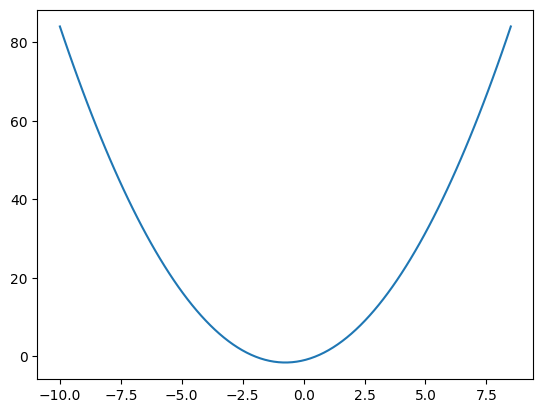

In [13]:
# Lets find the minimum of a parabola!

# Define the equation as a lambda function
fx = lambda  x: x**2 + 1.5 * x - 1

x = np.linspace(-10, 8.5, 100)

plt.plot(x, fx(x))

In [14]:
# Create a random point X
x_ = torch.randn(1)
x_.requires_grad = True

# Lets use Pytorch's Autograd to find the gradient at this point
y_ = fx(x_)
y_.backward()

# The gradient tells us the direction to travel to increase Y
dy_dx_ = x_.grad.item()
print("dy/dx is %.2f when x is %.2f" % (dy_dx_, x_))

dy/dx is -2.50 when x is -2.00


In [34]:
# Lets take some steps to decend the gradient!

# Create a random point X
x_ = torch.randn(1)
x_.requires_grad = True

# Create some loggers
x_logger = []
y_logger = []

# We'll keep track of how many steps we've done
counter = 0

# Set a scale for the step size
learning_rate = 0.01

# Initialise the gradient to a large value
dy_dx_ = 1000

# We'll limit the max number of steps so we don't create an infinite loop
max_num_steps = 1000

# Keep taking steps untill the gradient is small
while np.abs(dy_dx_) > 0.001:
    # Get the Y point at the current x value
    y_ = fx(x_)
    
    # Calculate the gradient at this point
    y_.backward()
    dy_dx_ = x_.grad.item()

    # Pytorch will not keep track of operations within a torch.no_grad() block
    # We don't want Pytorch to add our gradient decent step to the computational graph!
    with torch.no_grad():
        # Take a step down (decend) the curve
        x_ -= learning_rate * dy_dx_
        
        # Pytorch will accumulate the gradient over multiple backward passes
        # For our use case we don't want this to happen so we need to set it to zero
        # After we have used it
        x_.grad.zero_()
        
        # Log the X and Y points to plot
        x_logger.append(x_.item())
        y_logger.append(y_.item())
        
    counter += 1
    
    if counter == max_num_steps:
        break

print("Y minimum is %.2f and is when X = %.2f, found after %d steps" % (y_.item(), x_.item(), counter))

Y minimum is -1.56 and is when X = -0.75, found after 410 steps
